Binary Classification

Iris Logistic regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset("iris")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df = df[df['species']!= 'setosa']

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
x = df.iloc[:,:-1]
x

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y = df.iloc[:,-1]
y

50     versicolor
51     versicolor
52     versicolor
53     versicolor
54     versicolor
          ...    
145     virginica
146     virginica
147     virginica
148     virginica
149     virginica
Name: species, Length: 100, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('scaler',StandardScaler()),('model',LogisticRegression())])

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = {'model__penalty':["l1","l2","elasticnet"],
              'model__C':[0.2,1,3,6,10,15,30,50],
              'model__solver': ['liblinear', 'saga'],
              "model__max_iter": [100,500,1000],
              "model__l1_ratio": [0.1, 0.5, 0.9]}
grid = GridSearchCV(pipe,param_grid=parameters,scoring="roc_auc",cv=5)

In [14]:
grid.fit(x_train,y_train)

c:\jupyter\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\jupyter\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\jupyter\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\jupyter\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\jupyter\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\jupyter\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserW

,estimator,Pipeline(step...egression())])
,param_grid,"{'model__C': [0.2, 1, ...], 'model__l1_ratio': [0.1, 0.5, ...], 'model__max_iter': [100, 500, ...], 'model__penalty': ['l1', 'l2', ...], ...}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [15]:
grid.best_params_

{'model__C': 0.2,
 'model__l1_ratio': 0.1,
 'model__max_iter': 100,
 'model__penalty': 'l2',
 'model__solver': 'liblinear'}

In [16]:
grid.best_score_

np.float64(1.0)

In [17]:
grid.best_estimator_

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.2


In [18]:
grid.best_index_

np.int64(2)

In [19]:
grid.cv_results_

{'mean_fit_time': array([0.00632277, 0.00266771, 0.00250301, 0.00258431, 0.0019134 ,
        0.00249095, 0.00259895, 0.0027514 , 0.00235777, 0.00246172,
        0.0018734 , 0.0024735 , 0.0022716 , 0.00266542, 0.0022644 ,
        0.00284753, 0.00187397, 0.00252318, 0.00239382, 0.00258298,
        0.00237451, 0.00244241, 0.00190248, 0.00249176, 0.00242801,
        0.00269012, 0.00370727, 0.00256019, 0.00194864, 0.00249195,
        0.00239687, 0.00257969, 0.00272098, 0.00270066, 0.0019906 ,
        0.00246253, 0.00235376, 0.00259762, 0.00231843, 0.00245137,
        0.00187535, 0.00253115, 0.00266123, 0.00265341, 0.00229964,
        0.00249338, 0.00188932, 0.00255871, 0.00238614, 0.00266829,
        0.00237875, 0.00295067, 0.00194974, 0.00248046, 0.00235758,
        0.00568457, 0.00237141, 0.00254288, 0.00198665, 0.00288229,
        0.00293069, 0.0032011 , 0.00273728, 0.0027472 , 0.00181088,
        0.00256076, 0.00233359, 0.00282898, 0.00256896, 0.002739  ,
        0.00188708, 0.0025836 ,

In [20]:
y_pred_prob = grid.predict_proba(x_test)[:,1]
y_pred_prob

array([0.45381396, 0.78752654, 0.94001495, 0.06639773, 0.11638447,
       0.10920013, 0.46669577, 0.92941955, 0.03771256, 0.20396241,
       0.40862145, 0.05324857, 0.63929935, 0.54578324, 0.95257193,
       0.30244353, 0.57746093, 0.55399648, 0.06793151, 0.03483409])

In [21]:
y_test

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [22]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
auc1 = roc_auc_score(y_test,y_pred_prob)
auc2 = auc(fpr,tpr)

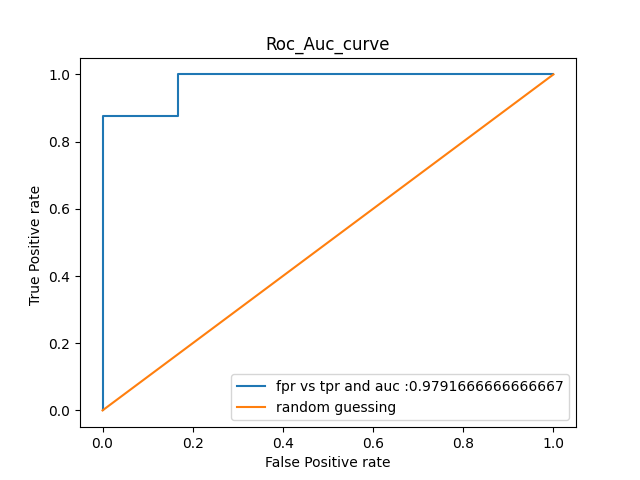

In [23]:
import matplotlib.pyplot as plt
%matplotlib widget
plt.plot(fpr,tpr,label = f"fpr vs tpr and auc :{auc1}")
plt.plot((0,1),(0,1),label  ="random guessing")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate ")
plt.legend()
plt.title("Roc_Auc_curve")
plt.show()

In [30]:
idx = np.where((tpr >= 0.9) & (fpr <= 0.2))[0]
best_threshold = thresholds[idx[-1]]
best_threshold

np.float64(0.45381395662755925)

In [31]:
y_pred = (y_pred_prob >= best_threshold).astype(int)

In [32]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [33]:
y_test

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
print(f"Classification Report : {classification_report(y_test,y_pred)}")
print(f"confusion matrix : {confusion_matrix(y_test,y_pred)}")

Accuracy : 0.9
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.80      1.00      0.89         8

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20

confusion matrix : [[10  2]
 [ 0  8]]


In [36]:
from sklearn.metrics import precision_score,recall_score,f1_score,fbeta_score
print(f"Precision score : {precision_score(y_test,y_pred)}")
print(f"Recall_score : {recall_score(y_test,y_pred)}")
print(f"f1_score: {f1_score(y_test,y_pred)}")
print(f"f0.5_score: {fbeta_score(y_test,y_pred,beta=0.5)}")
print(f"f2_score: {fbeta_score(y_test,y_pred,beta=2)}")

Precision score : 0.8
Recall_score : 1.0
f1_score: 0.8888888888888888
f0.5_score: 0.8333333333333334
f2_score: 0.9523809523809523
